# TS4: Simulación de un ADC (cuantización y alias) parte 2/2
## Consignas:
En esta tarea semanal retomamos la consigna de la tarea anterior, donde simulamos el bloque de cuantización de un ADC de B bits en un rango de $\pm{V_F}$ Volts. Ahora vamos a completar la simulación del ADC incluyendo la capacidad de muestrear a $fs$ Hertz.

Para ello se simulará el comportamiento del dispositivo al digitalizar una senoidal contaminada con un nivel predeterminado de ruido. Comenzaremos describiendo los parámetros a ajustar de la senoidal:

+ frecuencia $f_0$ arbitraria, por ejemplo $f_0=\frac{f_S}{N}=\triangle{f} $
+ energía normalizada, es decir energía (o varianza) unitaria

Con respecto a los parámetros de la secuencia de ruido, diremos que:

+ será de carácter aditivo, es decir la señal que entra al ADC será $s_R=s+n$. Siendo $n$ la secuencia que simula la interferencia, y $s$ la senoidal descrita anteriormente.
+ La potencia del ruido será $P_n=k_n.P_q$ W siendo el factor $k$ una escala para la potencia del ruido de cuantización $Pq=\frac{q^2}{12}$.
+ finalmente, $n$ será incorrelado y Gaussiano.

El ADC que deseamos simular trabajará a una frecuencia de muestreo $f_S=1000 H_z$ y tendrá un rango analógico de $\pm{V_F}=2$ Volts.

Se pide:

a) Generar el siguiente resultado producto de la experimentación. $B = 4$ bits, $k_n=1$.

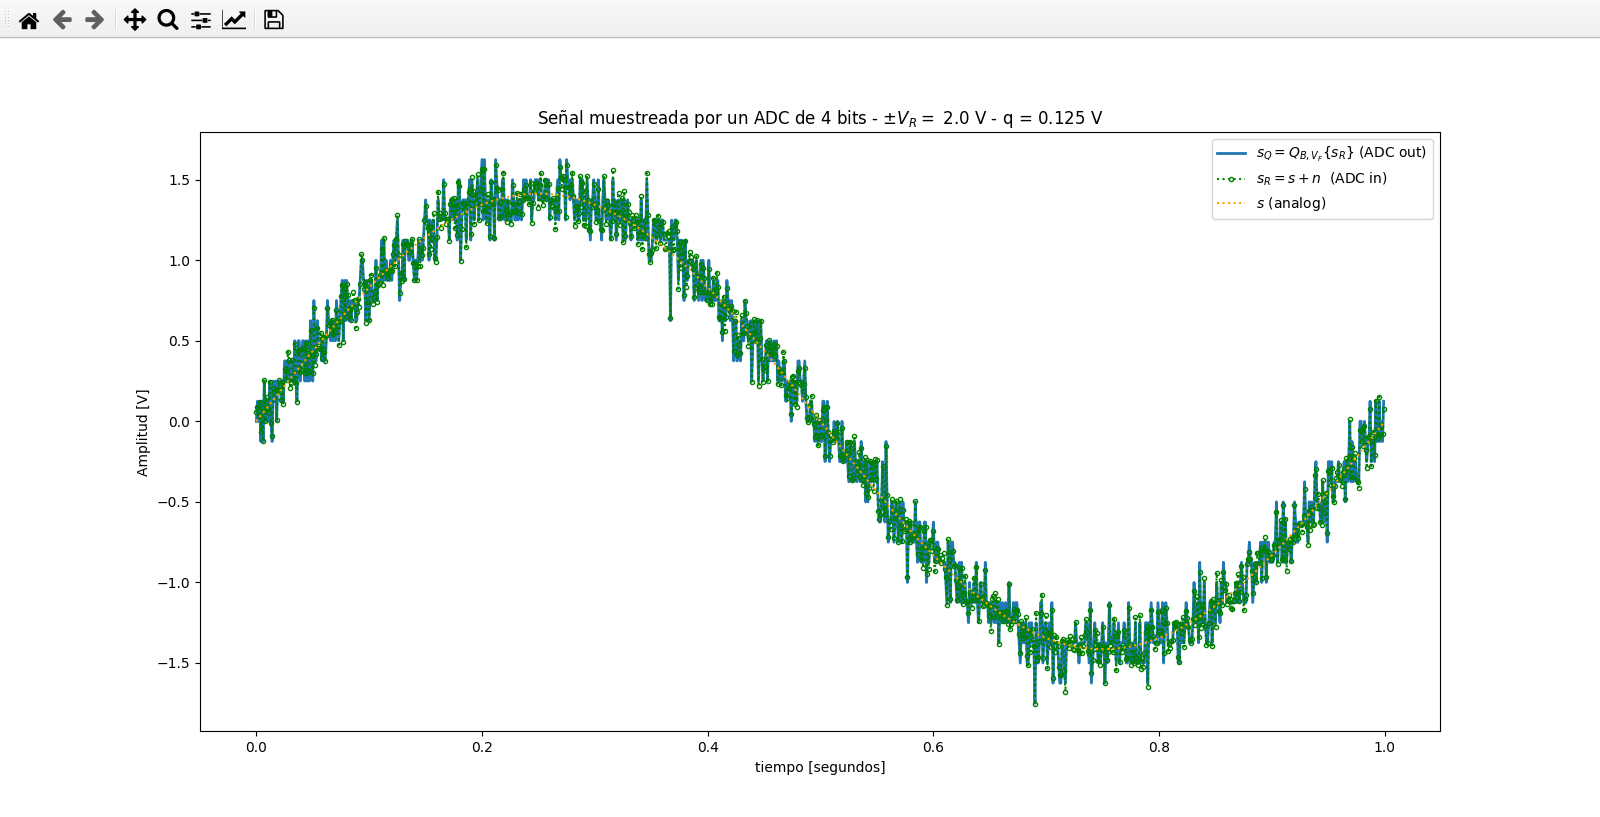

In [17]:
from IPython.display import Image

fig1 = Image(filename=('./1.png'))
fig2 = Image(filename=('./2.png'))
fig3 = Image(filename=('./3.png'))
fig1

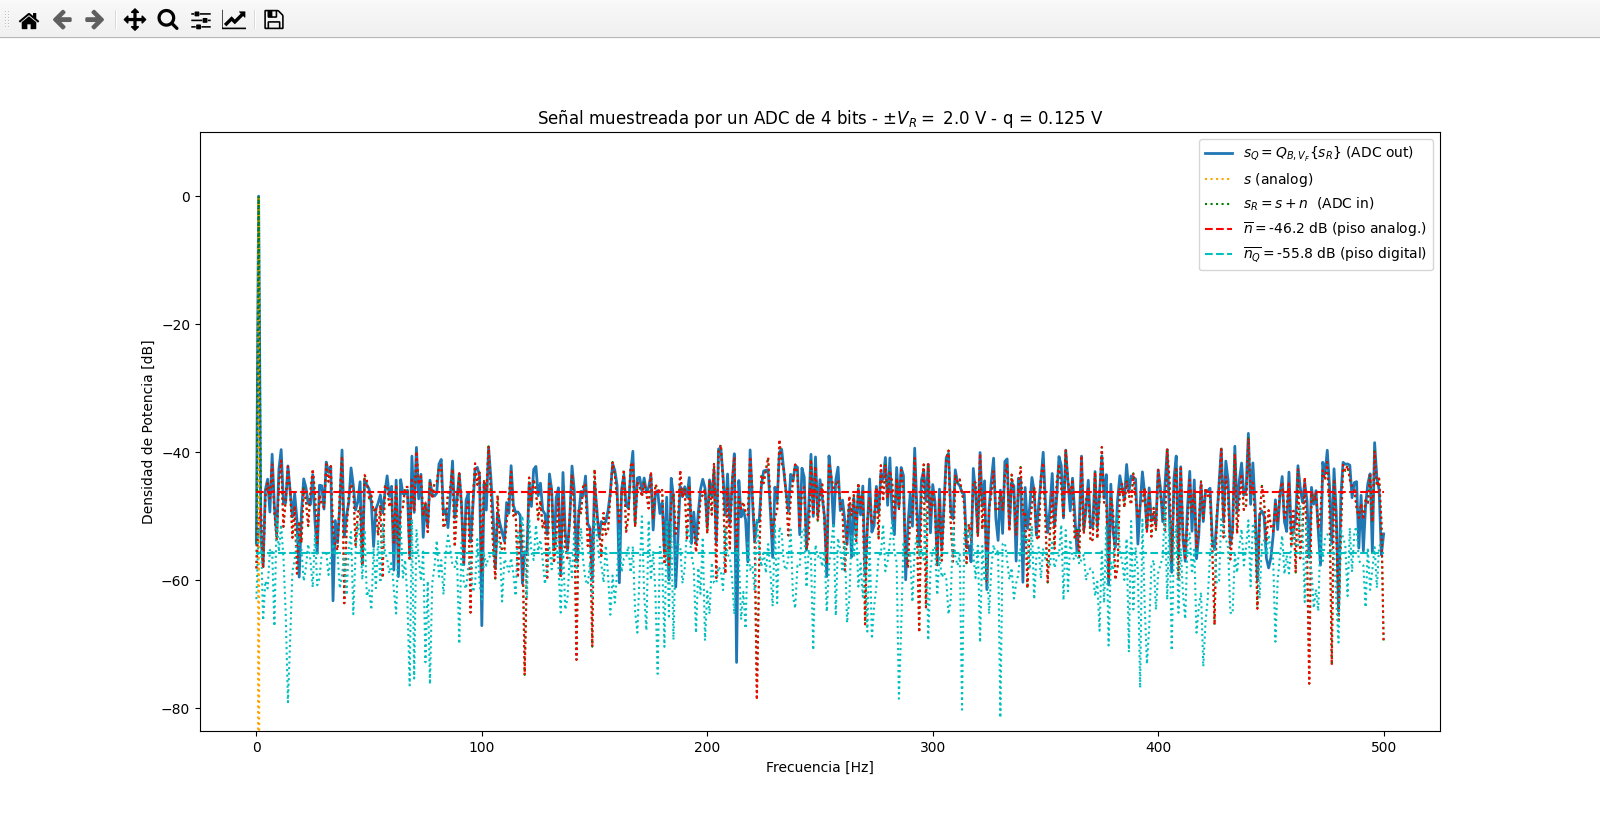

In [18]:
fig2

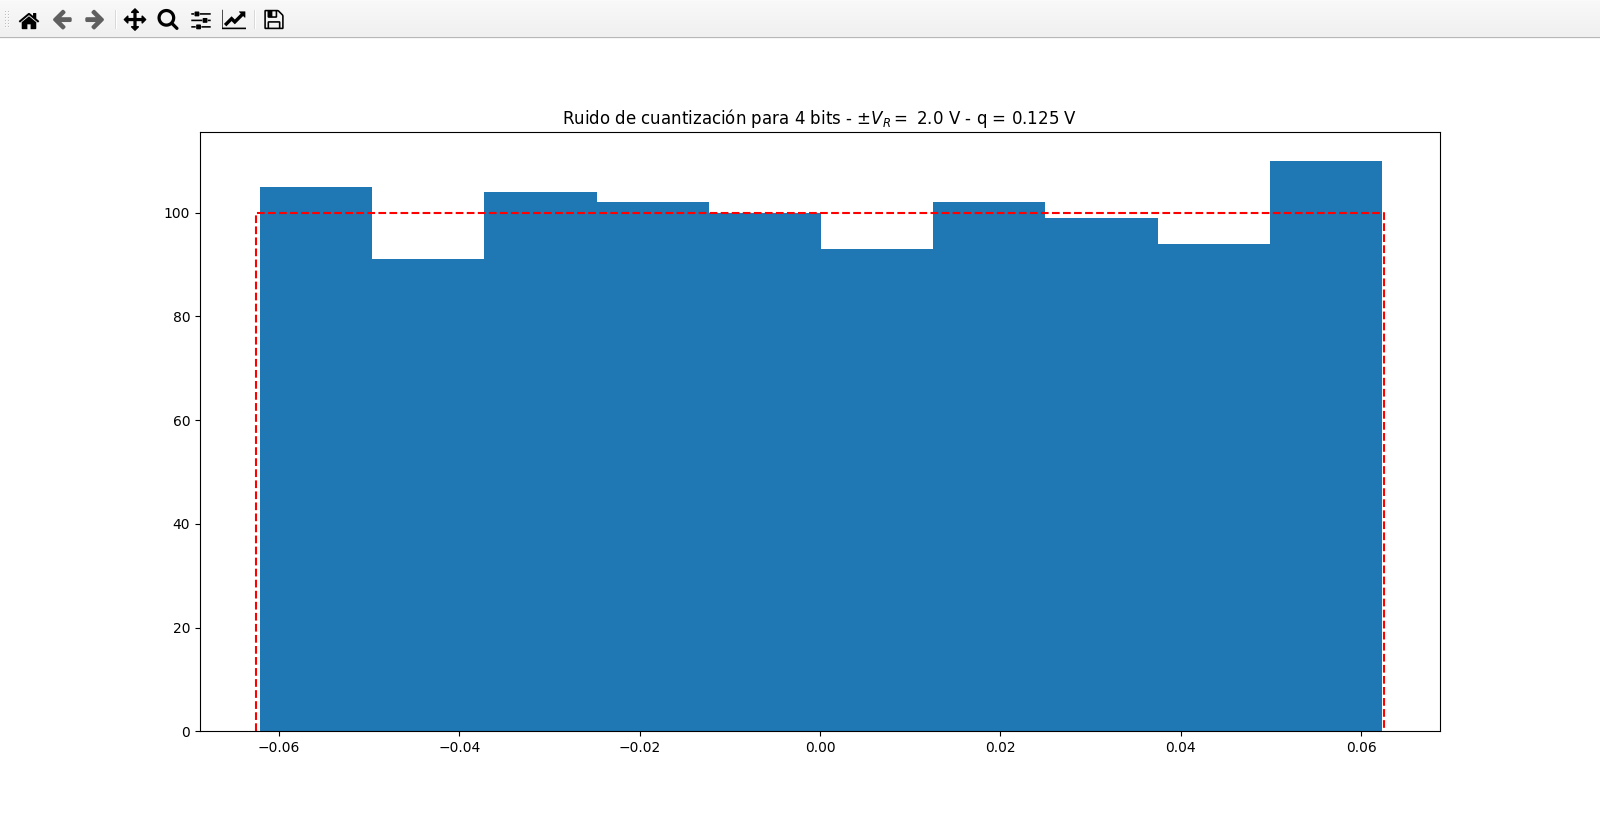

In [19]:
fig3

b) Analizar para una de las siguientes configuraciones $B ={4, 8 y 16}$ bits, $k_n={1/10,1,10}$. Discutir los resultados respecto a lo obtenido en a).

Ayuda:


Se da un script de referencia para que lo completes con la generación de los gráficos que se ven en esta tarea:

In [20]:
#######################################################################################################################
# #%% Configuración e inicio de la simulación
# #######################################################################################################################
 
# import numpy as np
# import matplotlib.pyplot as plt
# import scipy.signal as sig
 
# # Datos generales de la simulación
# fs = 1000.0 # frecuencia de muestreo (Hz)
# N = 1000   # cantidad de muestras
 
# # cantidad de veces más densa que se supone la grilla temporal para tiempo "continuo"
# over_sampling = 4
# N_os = N*over_sampling
 
# # Datos del ADC
# B = 4 # bits
# Vf = 2 # Volts
# q = Vf/2**B # Volts
 
# # datos del ruido
# kn = 10
# pot_ruido = q**2/12 * kn # Watts (potencia de la señal 1 W)
 
# ts = 1/fs # tiempo de muestreo
# df = fs/N # resolución espectral
 
# #######################################################################################################################
# #%% Acá arranca la simulación
 
# # ....
 
# #######################################################################################################################
# #%% Presentación gráfica de los resultados
# plt.close('all')
 
# plt.figure(1)
# plt.plot(tt, srq, lw=2, label='$ s_Q = Q_{B,V_F}\{s_R\} $ (ADC out)')
# plt.plot(tt, sr, linestyle=':', color='green',marker='o', markersize=3, markerfacecolor='none', markeredgecolor='green', fillstyle='none', label='$ s_R = s + n $  (ADC in)')
# plt.plot(tt_os, analog_sig, color='orange', ls='dotted', label='$ s $ (analog)')
 
# plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q) )
# plt.xlabel('tiempo [segundos]')
# plt.ylabel('Amplitud [V]')
# axes_hdl = plt.gca()
# axes_hdl.legend()
# plt.show()

# plt.figure(2)
# bfrec = ff <= fs/2
 
# Nnq_mean = np.mean(np.abs(ft_Nq)**2)
 
# plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Srq[bfrec])**2), lw=2, label='$ s_Q = Q_{B,V_F}\{s_R\} $ (ADC out)' )
# plt.plot( ff_os[ff_os <= fs/2], 10* np.log10(2*np.abs(ft_As[ff_os <= fs/2])**2), color='orange', ls='dotted', label='$ s $ (analog)' )
# plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_SR[bfrec])**2), ':g', label='$ s_R = s + n $  (ADC in)' )
# plt.plot( ff_os[ff_os <= fs/2], 10* np.log10(2*np.abs(ft_Nn[ff_os <= fs/2])**2), ':r')
# plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Nq[bfrec])**2), ':c')
# plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([nNn_mean, nNn_mean]) ), '--r', label= '$ \overline{n} = $' + '{:3.1f} dB (piso analog.)'.format(10* np.log10(2* nNn_mean)) )
# plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([Nnq_mean, Nnq_mean]) ), '--c', label='$ \overline{n_Q} = $' + '{:3.1f} dB (piso digital)'.format(10* np.log10(2* Nnq_mean)) )
# plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q) )
# plt.ylabel('Densidad de Potencia [dB]')
# plt.xlabel('Frecuencia [Hz]')
# axes_hdl = plt.gca()
# axes_hdl.legend()
# # suponiendo valores negativos de potencia ruido en dB
# plt.ylim((1.5*np.min(10* np.log10(2* np.array([Nnq_mean, nNn_mean]))),10)) 
# plt.figure(3)
# bins = 10
# plt.hist(nq, bins=bins)
# plt.plot( np.array([-q/2, -q/2, q/2, q/2]), np.array([0, N/bins, N/bins, 0]), '--r' )
# plt.title( 'Ruido de cuantización para {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q))

Bonus:

+ 💎 Encontrar la relación entre la cantidad de B bits del ADC y el SNR de la señal digitalizada. (Ver ***Holton. DSP Principles and App. 6.7 ADC Quantization pag. 387*** )
+ 🤯 Simular el efecto del aliasing junto con el muestreo.

## Resolucion:
a)
#### Modulos utilizados:

In [21]:
from tools_psd import signal_generator
import numpy as np
import matplotlib.pyplot as plt

#### Cuantizador:

In [22]:
def cuantizador(signal, vf, B):
    q=vf/2**(B-1)
    sr=np.round(signal/q)
    sr = sr*q
    for i,m in enumerate(sr):
        if m > vf:
            sr[i] = vf
        elif m < -vf:
            sr[i] = -vf
    return sr, q

#### Generador de señal:

In [23]:
def signal_generator( vmax = 1, dc = 0, ff = 1, ph=0, nn = 1, fs = 1, signal='senoidal', over_sampling=1):
    
    ts = 1/fs
    
    N_os = nn*over_sampling
    
    tt_os = np.linspace(0, (nn-1)*ts, N_os).flatten()
    
    x_os = np.array([], dtype=np.float64).reshape(N_os,0)
    
    if signal == 'senoidal':
        
        aux = vmax * np.sin(2*np.pi*ff*tt_os + ph) + dc
        x_os = np.hstack([x_os, aux.reshape(N_os,1)] )
        x_os = x_os.reshape(N_os,)
        
    elif signal == 'ruido':
        
        x_os = np.random.random_sample((N_os,))
    
    tt = np.linspace(0, (nn-1)*ts, nn).flatten()
    x = x_os[::over_sampling]
    return tt_os, x_os, tt, x

#### Graficos de la señal muestreada:

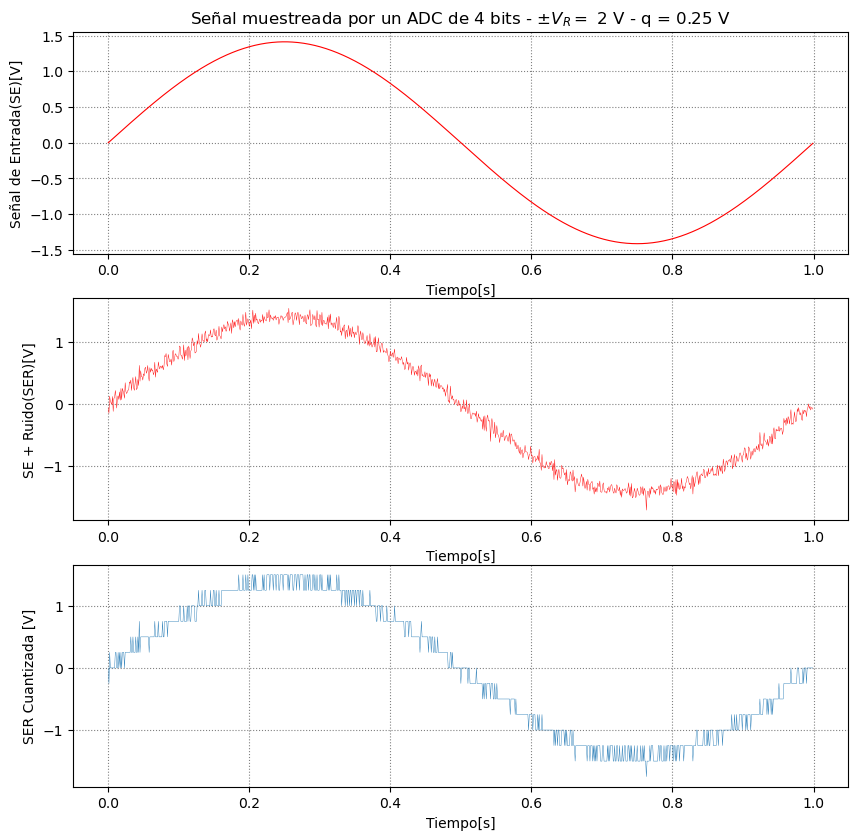

In [24]:
plt.close()
fig1 = plt.figure(1, figsize=(10, 10), dpi=100)

#========Generador=============
ff = 1
fs = 1000
nn = 1000
vmax = 1
dc = 0
ph1 = 0
tipo_sg = 'senoidal'
ov_s=1
#==============================

#=======Datos ADC==============
vf=2  #Rango en volts del ADC  
B=4   #Resolucion del ADC
q=vf/2**(B-1)
#==============================

#=========Señal================
tt_os, xx_os, tt1, s = signal_generator(vmax, dc, ff, ph1, nn, fs, tipo_sg, over_sampling=ov_s)
s = s/np.sqrt(np.var(s))
#==============================

#=======Ruido analogico========
Kn = 1
pot_n = ((q**2)/12)*Kn
r = np.random.normal(0, np.sqrt(pot_n), nn)
r = r.reshape(nn,)
sr = np.add(s, r)
#==============================

#===========ADC================
sq, q = cuantizador(sr, vf, B)
#==============================

fig1.add_subplot(3,1,1)
plt.plot(tt1, s, linewidth=0.8, color='red')
plt.grid(color='gray', linestyle='dotted', linewidth=0.8)
plt.xlabel('Tiempo[s]')
plt.ylabel('Señal de Entrada(SE)[V]')
plt.title(f'Señal muestreada por un ADC de {B} bits - $\pm V_R= $ {vf} V - q = {q} V')

fig1.add_subplot(3,1,2)
plt.grid(color='gray', linestyle='dotted', linewidth=0.8)
plt.xlabel('Tiempo[s]')
plt.ylabel('SE + Ruido(SER)[V]')
plt.plot(tt1, sr, linewidth=0.3, color='red')

fig1.add_subplot(3,1,3)
plt.grid(color='gray', linestyle='dotted', linewidth=0.8)
plt.xlabel('Tiempo[s]')
plt.ylabel('SER Cuantizada [V]')
plt.plot(tt1, sq, linewidth=0.3)

En el primer grafico tenemos una señal analogica senoidal ideal imposible de conseguir en la practica, en el segundo grafico podemos apreciar la adicion de una señal de ruido que simula el comportamiento real de una señal analogica y por ultimo podemos ver en el tercer grafico la cuantizacion de un ADC que en determinadas secciones de la señal se logra apreciar los saltos de cuantizacion entre dos pasos por efectos del ruido que añadimos.

#### Graficos de Densidades de potencia:

Text(0.5, 1.0, 'Señal muestreada por un ADC de 4 bits - $\\pm V_R= $ 2 V - q = 0.25 V')

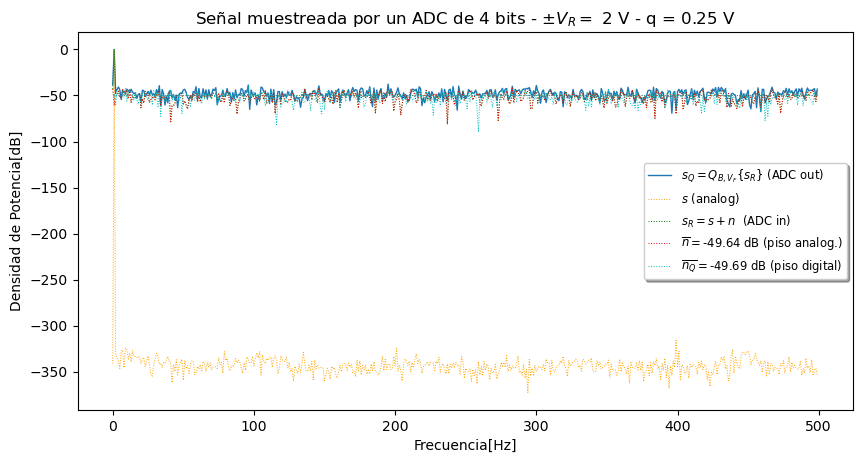

In [25]:
err = sr - sq

plt.figure(2, figsize=(10, 5), dpi=100)

f = np.fft.fftfreq(nn, d=1/fs)

ft_R = (1/nn)*np.fft.fft(r)
ft_S = (1/nn)*np.fft.fft(s)
ft_SQ = (1/nn)*np.fft.fft(sq)
ft_SR = (1/nn)*np.fft.fft(sr)
ft_ERR = (1/nn)*np.fft.fft(err)

ff = f[:f.size // 2]

mean_ERR = np.mean(np.abs(ft_ERR)**2)
mean_R = np.mean(np.abs(ft_R)**2)


plt.plot(ff, 10*np.log10(2*np.abs(ft_SQ[:ft_SQ.size // 2])**2), linewidth=1, label='$ s_Q = Q_{B,V_F}\{s_R\} $ (ADC out)')
plt.plot(ff, 10*np.log10(2*np.abs(ft_S[:ft_S.size // 2])**2), color='orange', ls='dotted', linewidth=0.7, label='$ s $ (analog)')
plt.plot(ff, 10*np.log10(2*np.abs(ft_SR[:ft_SR.size // 2])**2), ':g', linewidth=0.7, label='$ s_R = s + n $  (ADC in)')

plt.plot(ff, 10*np.log10(2*np.abs(ft_R[:ft_R.size // 2])**2), ':r', linewidth=0.7)
plt.plot(np.arange(nn//2), 10*np.log10(2*(np.zeros(nn//2)+mean_R)),':r', linewidth=0.7, label= '$ \overline{n} = $'+f'{round(10*np.log10(2*mean_R),2)} dB (piso analog.)')

plt.plot(ff, 10*np.log10(2*np.abs(ft_ERR[:ft_ERR.size // 2])**2),':c', linewidth=0.7)
plt.plot(np.arange(nn//2), 10*np.log10(2*(np.zeros(nn//2)+mean_ERR)),':c', linewidth=0.7, label='$ \overline{n_Q} = $' + f'{round(10*np.log10(2*mean_ERR),2)} dB (piso digital)')

plt.legend(loc='center right', shadow=True, fontsize='small')
plt.xlabel('Frecuencia[Hz]')
plt.ylabel('Densidad de Potencia[dB]')
plt.title(f'Señal muestreada por un ADC de {B} bits - $\pm V_R= $ {vf} V - q = {q} V')

En este grafico lo primero en lo que hacemos foco es inevitablemente en la señal S(analogica), debemos destacar antes que nos encontramos graficando una Densidad de potencia x Frecuencia, por lo que esto nos quiere decir que para nuestra senoidal analogica ideal estamos detectando un ruido con un nivel de potencia infimo de $\approx{-350}dB$ este piso de ruido es imposible de conseguir en la practica.

(-90.0, 10.0)

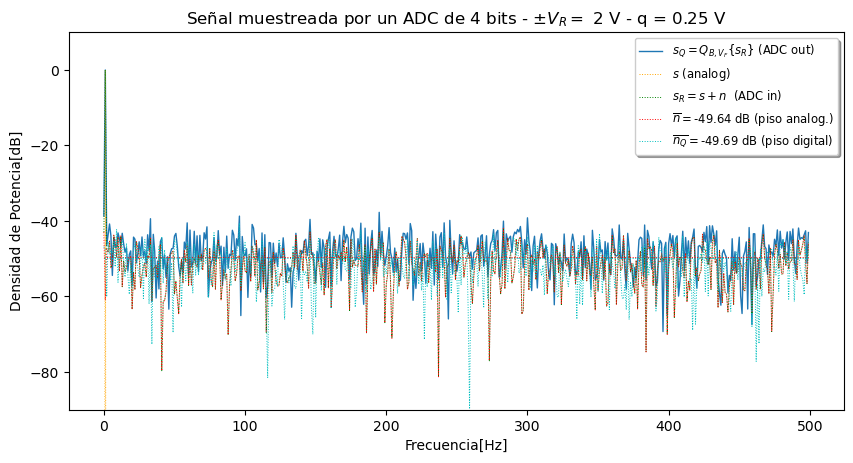

In [26]:
plt.figure(3, figsize=(10, 5), dpi=100)

plt.plot(ff, 10*np.log10(2*np.abs(ft_SQ[:ft_SQ.size // 2])**2), linewidth=1, label='$ s_Q = Q_{B,V_F}\{s_R\} $ (ADC out)')
plt.plot(ff, 10*np.log10(2*np.abs(ft_S[:ft_S.size // 2])**2), color='orange', ls='dotted', linewidth=0.7, label='$ s $ (analog)')
plt.plot(ff, 10*np.log10(2*np.abs(ft_SR[:ft_SR.size // 2])**2), ':g', linewidth=0.7, label='$ s_R = s + n $  (ADC in)')

plt.plot(ff, 10*np.log10(2*np.abs(ft_R[:ft_R.size // 2])**2), ':r', linewidth=0.7)
plt.plot(np.arange(nn//2), 10*np.log10(2*(np.zeros(nn//2)+mean_R)),':r', linewidth=0.7, label= '$ \overline{n} = $'+f'{round(10*np.log10(2*mean_R),2)} dB (piso analog.)')

plt.plot(ff, 10*np.log10(2*np.abs(ft_ERR[:ft_ERR.size // 2])**2),':c', linewidth=0.7)
plt.plot(np.arange(nn//2), 10*np.log10(2*(np.zeros(nn//2)+mean_ERR)),':c', linewidth=0.7, label='$ \overline{n_Q} = $' + f'{round(10*np.log10(2*mean_ERR),2)} dB (piso digital)')

plt.legend(loc='upper right', shadow=True, fontsize='small')
plt.xlabel('Frecuencia[Hz]')
plt.ylabel('Densidad de Potencia[dB]')
plt.title(f'Señal muestreada por un ADC de {B} bits - $\pm V_R= $ {vf} V - q = {q} V')
plt.ylim(-90, 10)

En este enfoque del grafico anterior observamos la potencia del ruido que adicionamos a la senoidal ideal, como vemos la señal analogica con ruido y la señal digital con ruido tienen aproximadamente la misma potencia pero no debemos interpretarlas como lo mismo, en una visualizamos la media de la potencia del ruido añadido y en la otra se visualiza la media de la potencia del error de cuantizacion, como vimos en la teoria lo ideal para el diseño de un filtro es que la potencia del ruido analogico, que en este caso es proporcional a $\frac{q^2}{12}$, este por debajo del ruido de cuantizacion. 

#### Graficos de error de cuantizacion:

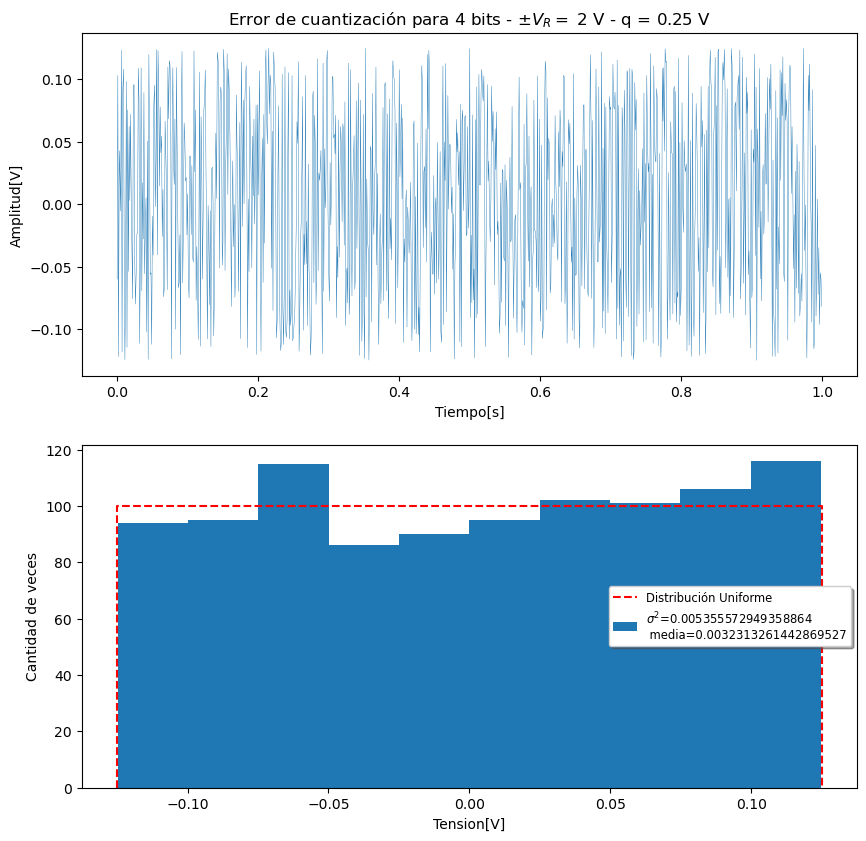

In [27]:
fig2 = plt.figure(4, figsize=(10, 10), dpi=100)
fig2.add_subplot(2,1,1)
plt.plot(tt1, err, linewidth=0.3)
plt.xlabel('Tiempo[s]')
plt.ylabel('Amplitud[V]')
plt.title(f'Error de cuantización para {B} bits - $\pm V_R= $ {vf} V - q = {q} V')

fig2.add_subplot(2,1,2)
plt.hist(err, bins=10, label=f"$\sigma^2$={np.var(err)}\n media={np.mean(err)}")
plt.plot( np.array([-q/2, -q/2, q/2, q/2]), np.array([0, nn/10, nn/10, 0]), '--r', label="Distribución Uniforme")
plt.xlabel('Tension[V]')
plt.ylabel('Cantidad de veces')
plt.legend(loc='center right', shadow=True, fontsize='small')

En este grafico podemos verificar lo visto en teoria que habla justamente que el ruido de cuantizacion sigue y se aproxima a una distribucion uniforme.

b)

Text(0.5, 1.0, 'Señal muestreada por un ADC de 16 bits - $\\pm V_R= $ 2 V - q = 6.103515625e-05 V')

<Figure size 1000x1000 with 0 Axes>

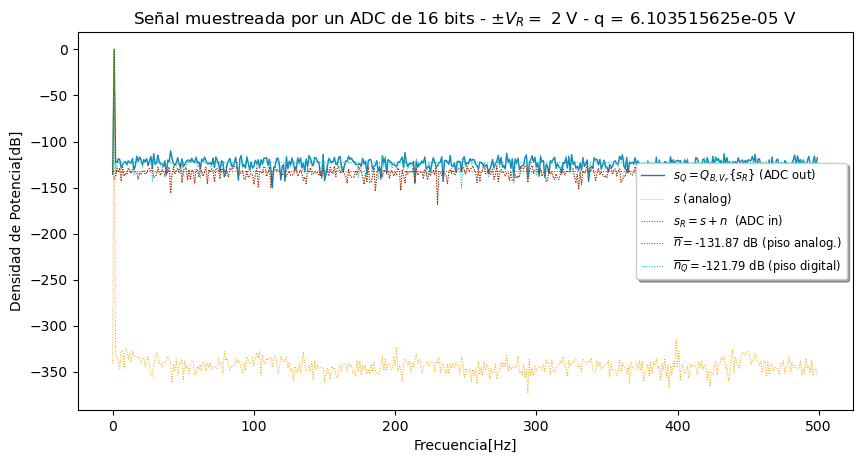

In [28]:
plt.close()
fig1 = plt.figure(1, figsize=(10, 10), dpi=100)

#========Generador=============
ff = 1
fs = 1000
nn = 1000
vmax = 1
dc = 0
ph1 = 0
tipo_sg = 'senoidal'
ov_s=1
#==============================

#=======Datos ADC==============
vf=2  #Rango en volts del ADC  
B=16   #Resolucion del ADC
q=vf/2**(B-1)
#==============================

#=========Señal================
tt_os, xx_os, tt1, s = signal_generator(vmax, dc, ff, ph1, nn, fs, tipo_sg, over_sampling=ov_s)
s = s/np.sqrt(np.var(s))
#==============================

#=======Ruido analogico========
Kn = 1/10
pot_n = ((q**2)/12)*Kn
r = np.random.normal(0, np.sqrt(pot_n), nn)
r = r.reshape(nn,)
sr = np.add(s, r)
#==============================

#===========ADC================
sq, q = cuantizador(sr, vf, B)
#==============================

err = sr - sq

plt.figure(2, figsize=(10, 5), dpi=100)

f = np.fft.fftfreq(nn, d=1/fs)

ft_R = (1/nn)*np.fft.fft(r)
ft_S = (1/nn)*np.fft.fft(s)
ft_SQ = (1/nn)*np.fft.fft(sq)
ft_SR = (1/nn)*np.fft.fft(sr)
ft_ERR = (1/nn)*np.fft.fft(err)

ff = f[:f.size // 2]

mean_ERR = np.mean(np.abs(ft_ERR)**2)
mean_R = np.mean(np.abs(ft_R)**2)

plt.plot(ff, 10*np.log10(2*np.abs(ft_SQ[:ft_SQ.size // 2])**2), linewidth=1, label='$ s_Q = Q_{B,V_F}\{s_R\} $ (ADC out)')
plt.plot(ff, 10*np.log10(2*np.abs(ft_S[:ft_S.size // 2])**2), color='orange', ls='dotted', linewidth=0.7, label='$ s $ (analog)')
plt.plot(ff, 10*np.log10(2*np.abs(ft_SR[:ft_SR.size // 2])**2), ':g', linewidth=0.7, label='$ s_R = s + n $  (ADC in)')

plt.plot(ff, 10*np.log10(2*np.abs(ft_R[:ft_R.size // 2])**2), ':r', linewidth=0.7)
plt.plot(np.arange(nn//2), 10*np.log10(2*(np.zeros(nn//2)+mean_R)),':r', linewidth=0.7, label= '$ \overline{n} = $'+f'{round(10*np.log10(2*mean_R),2)} dB (piso analog.)')

plt.plot(ff, 10*np.log10(2*np.abs(ft_ERR[:ft_ERR.size // 2])**2),':c', linewidth=0.7)
plt.plot(np.arange(nn//2), 10*np.log10(2*(np.zeros(nn//2)+mean_ERR)),':c', linewidth=0.7, label='$ \overline{n_Q} = $' + f'{round(10*np.log10(2*mean_ERR),2)} dB (piso digital)')

plt.legend(loc='center right', shadow=True, fontsize='small')
plt.xlabel('Frecuencia[Hz]')
plt.ylabel('Densidad de Potencia[dB]')
plt.title(f'Señal muestreada por un ADC de {B} bits - $\pm V_R= $ {vf} V - q = {q} V')

En este caso considero un $K_n = \frac{1}{10}$ y un ADC de 16 Bits y como podemos apreciar la potencia de la señal S(analogica) no resulta afectada, pero si las demas potencias graficadas que descienden a una valor aproximado de $\approx{-125}dB$

(-170.0, -80.0)

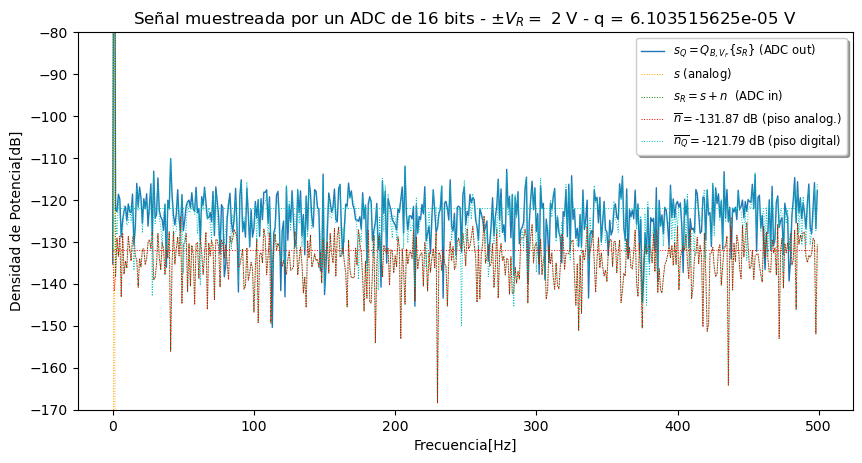

In [29]:
plt.figure(3, figsize=(10, 5), dpi=100)

plt.plot(ff, 10*np.log10(2*np.abs(ft_SQ[:ft_SQ.size // 2])**2), linewidth=1, label='$ s_Q = Q_{B,V_F}\{s_R\} $ (ADC out)')
plt.plot(ff, 10*np.log10(2*np.abs(ft_S[:ft_S.size // 2])**2), color='orange', ls='dotted', linewidth=0.7, label='$ s $ (analog)')
plt.plot(ff, 10*np.log10(2*np.abs(ft_SR[:ft_SR.size // 2])**2), ':g', linewidth=0.7, label='$ s_R = s + n $  (ADC in)')

plt.plot(ff, 10*np.log10(2*np.abs(ft_R[:ft_R.size // 2])**2), ':r', linewidth=0.7)
plt.plot(np.arange(nn//2), 10*np.log10(2*(np.zeros(nn//2)+mean_R)),':r', linewidth=0.7, label= '$ \overline{n} = $'+f'{round(10*np.log10(2*mean_R),2)} dB (piso analog.)')

plt.plot(ff, 10*np.log10(2*np.abs(ft_ERR[:ft_ERR.size // 2])**2),':c', linewidth=0.7)
plt.plot(np.arange(nn//2), 10*np.log10(2*(np.zeros(nn//2)+mean_ERR)),':c', linewidth=0.7, label='$ \overline{n_Q} = $' + f'{round(10*np.log10(2*mean_ERR),2)} dB (piso digital)')

plt.legend(loc='upper right', shadow=True, fontsize='small')
plt.xlabel('Frecuencia[Hz]')
plt.ylabel('Densidad de Potencia[dB]')
plt.title(f'Señal muestreada por un ADC de {B} bits - $\pm V_R= $ {vf} V - q = {q} V')
plt.ylim(-170, -80)

Al tener un valor de $K_n$ menor a 1 la potencia del ruido analogico sera en este caso 10 veces menor que la potencia del ruido de cuantizacion, en este caso no necesitariamos un filtro pasa bajos en la entrada del ADC.

#### Bonus:

+ La relacion entre la cantidad de B bits del ADC y el SNR de la señal digitalizada esta dada por la siguiente expresion:

\begin{equation}
SNR = 6.02B + 10.79 + 20\log{\frac{\sigma_x}{V_{FS}}}
\end{equation}

Siendo:
$B$: Resolucion del ADC, $\sigma_x$:La RMS de la señal o desviacion estandar de la señal, $V_{FS}$: Rango maximo de tension del ADC
Aproximadamente por cada bit adicional de resolucion del ADC el SNR se ve incrementado en 6dB.
Calculemos el SNR para el inciso b)

In [30]:
SNR = 6.02*B + 10.79 + 20*np.log(np.std(sq)/vf)
print('El SNR para la señal digital con un ADC de 16 Bits es:', SNR)
print('SNR por bit:', SNR/B,'dB/Bit que es aproximadamente', round(SNR/B),'dB/Bit')

El SNR para la señal digital con un ADC de 16 Bits es: 93.24706757718255
SNR por bit: 5.827941723573909 dB/Bit que es aproximadamente 6 dB/Bit


+ Efecto aliasing:
Si nosotros jugamos con el factor $over_sampling$ podemos lograr observar el fecto aliasing:

Text(0.5, 1.0, 'Señal muestreada por un ADC de 16 bits - $\\pm V_R= $ 2 V - q = 6.103515625e-05 V')

<Figure size 1000x1000 with 0 Axes>

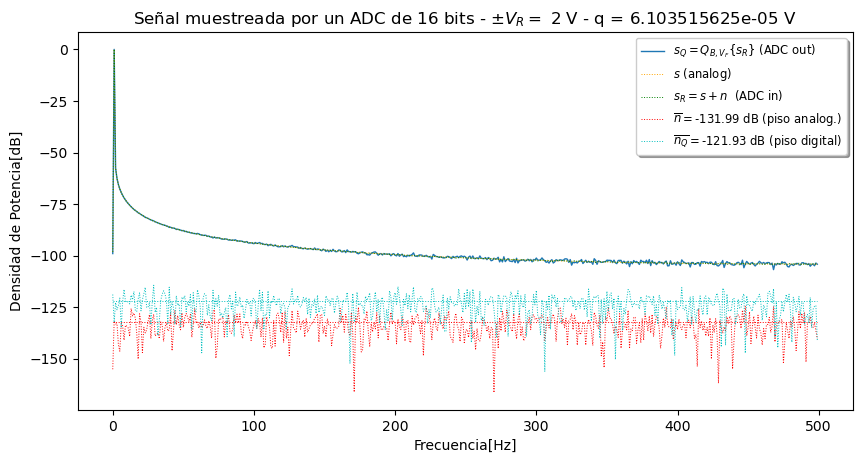

In [31]:
plt.close()
fig1 = plt.figure(1, figsize=(10, 10), dpi=100)

#========Generador=============
ff = 1
fs = 1000
nn = 1000
vmax = 1
dc = 0
ph1 = 0
tipo_sg = 'senoidal'
ov_s=100
#==============================

#=======Datos ADC==============
vf=2  #Rango en volts del ADC  
B=16   #Resolucion del ADC
q=vf/2**(B-1)
#==============================

#=========Señal================
tt_os, xx_os, tt1, s = signal_generator(vmax, dc, ff, ph1, nn, fs, tipo_sg, over_sampling=ov_s)
s = s/np.sqrt(np.var(s))
#==============================

#=======Ruido analogico========
Kn = 1/10
pot_n = ((q**2)/12)*Kn
r = np.random.normal(0, np.sqrt(pot_n), nn)
r = r.reshape(nn,)
sr = np.add(s, r)
#==============================

#===========ADC================
sq, q = cuantizador(sr, vf, B)
#==============================

err = sr - sq

plt.figure(2, figsize=(10, 5), dpi=100)

f = np.fft.fftfreq(nn, d=1/fs)

ft_R = (1/nn)*np.fft.fft(r)
ft_S = (1/nn)*np.fft.fft(s)
ft_SQ = (1/nn)*np.fft.fft(sq)
ft_SR = (1/nn)*np.fft.fft(sr)
ft_ERR = (1/nn)*np.fft.fft(err)

ff = f[:f.size // 2]

mean_ERR = np.mean(np.abs(ft_ERR)**2)
mean_R = np.mean(np.abs(ft_R)**2)

plt.plot(ff, 10*np.log10(2*np.abs(ft_SQ[:ft_SQ.size // 2])**2), linewidth=1, label='$ s_Q = Q_{B,V_F}\{s_R\} $ (ADC out)')
plt.plot(ff, 10*np.log10(2*np.abs(ft_S[:ft_S.size // 2])**2), color='orange', ls='dotted', linewidth=0.7, label='$ s $ (analog)')
plt.plot(ff, 10*np.log10(2*np.abs(ft_SR[:ft_SR.size // 2])**2), ':g', linewidth=0.7, label='$ s_R = s + n $  (ADC in)')

plt.plot(ff, 10*np.log10(2*np.abs(ft_R[:ft_R.size // 2])**2), ':r', linewidth=0.7)
plt.plot(np.arange(nn//2), 10*np.log10(2*(np.zeros(nn//2)+mean_R)),':r', linewidth=0.7, label= '$ \overline{n} = $'+f'{round(10*np.log10(2*mean_R),2)} dB (piso analog.)')

plt.plot(ff, 10*np.log10(2*np.abs(ft_ERR[:ft_ERR.size // 2])**2),':c', linewidth=0.7)
plt.plot(np.arange(nn//2), 10*np.log10(2*(np.zeros(nn//2)+mean_ERR)),':c', linewidth=0.7, label='$ \overline{n_Q} = $' + f'{round(10*np.log10(2*mean_ERR),2)} dB (piso digital)')

plt.legend(loc='upper right', shadow=True, fontsize='small')
plt.xlabel('Frecuencia[Hz]')
plt.ylabel('Densidad de Potencia[dB]')
plt.title(f'Señal muestreada por un ADC de {B} bits - $\pm V_R= $ {vf} V - q = {q} V')

Como vemos ahora la potencia de nuestra señal analogica se ve afectada en un incremento de mas de 200db con un valor de $over_sampling = 100$ quedando la potencia ruido de la señal analogica ideal por encima de las demas potencias.